<a href="https://colab.research.google.com/github/bchaithanyasai/PredictLateArrivalsPaper/blob/master/Feature_Selection_and_Predictive_Modelling_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

train_data=pd.read_csv("/content/drive/My Drive/train_data_2019.csv")
test_data=pd.read_csv("/content/drive/My Drive/test_data_2019.csv")

In [3]:
print(train_data.OUTCOME.mean(),test_data.OUTCOME.mean())

0.5 0.2844134268265696


In [4]:
train_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,9E,AA,AS,B6,DL,EV,F9,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
0,2019.0,2.000000,17.000000,7.000000,0.363194,0.276112,0.172746,25.000000,86.000000,199.000000,43.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,594.0,586.000000,2085.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.000000,16.000000,18.000000,36.000000,35.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,2019.0,9.000000,4.000000,3.000000,0.280897,0.254714,0.988349,14.000000,115.000000,562.000000,79.000000,0.0,0.000000,0.0,26.000000,0.000000,0.0,1197.0,1167.000000,2936.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.000000,11.000000,13.000000,42.000000,3.000000,58.000000,11.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2019.0,3.000000,3.000000,7.000000,0.254740,0.295210,0.547704,10.000000,135.000000,829.000000,112.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1677.0,1689.000000,2879.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.000000,19.000000,21.000000,53.000000,40.000000,55.000000,20.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
3,2019.0,6.000000,17.000000,1.000000,0.307638,0.285337,1.000000,18.000000,164.000000,948.000000,135.000000,0.0,51.000000,0.0,67.000000,0.000000,15.0,1034.0,969.000000,3810.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.000000,15.000000,18.000000,9.000000,47.000000,31.000000,17.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,2019.0,4.000000,10.000000,3.000000,0.278899,0.346516,0.878470,24.000000,106.000000,431.000000,64.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1955.0,1924.000000,5199.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.000000,8.000000,9.000000,24.000000,0.000000,46.000000,8.000000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7803243,2019.0,10.663059,19.000000,3.347763,0.253447,0.246818,0.101423,32.336941,48.315296,100.000000,25.989178,0.0,0.000000,0.0,0.000000,0.000000,0.0,1698.0,1671.000000,4262.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.315296,13.315296,14.315296,15.315296,18.315296,6.630592,13.315296,47.652237,1.000000,1.000000,1.000000,1.000000,1.000000,1
7803244,2019.0,9.000000,19.355369,4.355369,0.225014,0.299424,1.000000,10.966946,118.000000,601.000000,90.611577,0.0,0.000000,0.0,75.809899,0.000000,0.0,1493.0,1506.000000,6008.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.677685,15.000000,16.000000,22.570303,33.000000,31.000000,17.000000,14.198322,0.000000,0.000000,0.000000,0.000000,0.000000,1
7803245,2019.0,5.140977,18.845860,5.295116,0.286872,0.298326,0.910206,11.268791,90.140977,408.000000,58.563907,0.0,0.000000,0.0,0.000000,2.255628,0.0,1173.0,1160.000000,1397.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.000000,13.000000,15.000000,23.295116,57.718047,27.859023,14.000000,34.563907,0.859023,0.859023,0.859023,0.859023,0.859023,1
7803246,2019.0,1.000000,21.805989,3.477604,0.311624,0.281179,0.305898,19.283594,106.000000,541.000000,80.761198,0.0,0.000000,0.0,0.000000,0.000000,0.0,

In [5]:
test_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,9E,AA,AS,B6,DL,EV,F9,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
0,2019,6,22,6,0.217848,0.254714,0.055675,11.0,130.0,605.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,1191,1167,2613,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9,10,12,54,5,15,10,5,1,1,1,1,1,0
1,2019,5,31,5,0.348094,0.270726,0.070983,33.0,61.0,229.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,974,1073,1811,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,22,22,23,28,35,36,23,1,1,1,1,1,1,1
2,2019,11,20,3,0.290462,0.316392,0.079499,16.0,110.0,416.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,1311,1437,1242,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,17,18,18,55,0,50,18,11,1,1,1,1,1,0
3,2019,5,13,1,0.326653,0.236877,0.047858,10.0,95.0,349.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,1410,1428,3700,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,12,13,2,15,50,12,12,1,1,1,1,1,0
4,2019,9,3,2,0.246815,0.273759,0.079499,16.0,99.0,448.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,5,18,161,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,16,17,17,22,1,16,33,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816597,2019,1,11,5,0.246815,0.300134,0.101423,9.0,130.0,674.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,401,544,303,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,14,14,15,18,21,31,14,27,1,1,1,1,1,0
1816598,2019,12,10,2,0.240225,0.273006,0.157092,20.0,131.0,626.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,91,30,3993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,55,55,6,9,15,1,1,1,1,1,0
1816599,2019,5,10,5,0.286687,0.263243,0.989352,13.0,85.0,345.0,52.0,0.0,0.0,0.0,20.0,0.0,0.0,1681,1712,3176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,18,18,19,58,20,45,19,11,0,0,0,0,0,1
1816600,2019,11,16,6,0.320773,0.223493,0.132316,11.0,103.0,563.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,117,5,5811,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,14,32,33,16,11,43,1,1,1,1,1,0


In [0]:
Y_train=pd.DataFrame(train_data['OUTCOME'])
X_train=train_data.drop("OUTCOME",axis=1)

Y_test=pd.DataFrame(test_data['OUTCOME'])
X_test=test_data.drop("OUTCOME",axis=1)

In [7]:
X_train

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,9E,AA,AS,B6,DL,EV,F9,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2019.0,2.000000,17.000000,7.000000,0.363194,0.276112,0.172746,25.000000,86.000000,199.000000,43.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,594.0,586.000000,2085.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.000000,16.000000,18.000000,36.000000,35.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019.0,9.000000,4.000000,3.000000,0.280897,0.254714,0.988349,14.000000,115.000000,562.000000,79.000000,0.0,0.000000,0.0,26.000000,0.000000,0.0,1197.0,1167.000000,2936.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.000000,11.000000,13.000000,42.000000,3.000000,58.000000,11.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2019.0,3.000000,3.000000,7.000000,0.254740,0.295210,0.547704,10.000000,135.000000,829.000000,112.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1677.0,1689.000000,2879.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.000000,19.000000,21.000000,53.000000,40.000000,55.000000,20.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,2019.0,6.000000,17.000000,1.000000,0.307638,0.285337,1.000000,18.000000,164.000000,948.000000,135.000000,0.0,51.000000,0.0,67.000000,0.000000,15.0,1034.0,969.000000,3810.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.000000,15.000000,18.000000,9.000000,47.000000,31.000000,17.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2019.0,4.000000,10.000000,3.000000,0.278899,0.346516,0.878470,24.000000,106.000000,431.000000,64.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1955.0,1924.000000,5199.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.000000,8.000000,9.000000,24.000000,0.000000,46.000000,8.000000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7803243,2019.0,10.663059,19.000000,3.347763,0.253447,0.246818,0.101423,32.336941,48.315296,100.000000,25.989178,0.0,0.000000,0.0,0.000000,0.000000,0.0,1698.0,1671.000000,4262.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.315296,13.315296,14.315296,15.315296,18.315296,6.630592,13.315296,47.652237,1.000000,1.000000,1.000000,1.000000,1.000000
7803244,2019.0,9.000000,19.355369,4.355369,0.225014,0.299424,1.000000,10.966946,118.000000,601.000000,90.611577,0.0,0.000000,0.0,75.809899,0.000000,0.0,1493.0,1506.000000,6008.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.677685,15.000000,16.000000,22.570303,33.000000,31.000000,17.000000,14.198322,0.000000,0.000000,0.000000,0.000000,0.000000
7803245,2019.0,5.140977,18.845860,5.295116,0.286872,0.298326,0.910206,11.268791,90.140977,408.000000,58.563907,0.0,0.000000,0.0,0.000000,2.255628,0.0,1173.0,1160.000000,1397.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.000000,13.000000,15.000000,23.295116,57.718047,27.859023,14.000000,34.563907,0.859023,0.859023,0.859023,0.859023,0.859023
7803246,2019.0,1.000000,21.805989,3.477604,0.311624,0.281179,0.305898,19.283594,106.000000,541.000000,80.761198,0.0,0.000000,0.0,0.000000,0.000000,0.0,340.0,355.000000,1094.000000

In [8]:
X_train[:5449996]

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,9E,AA,AS,B6,DL,EV,F9,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2019.0,2.0,17.0,7.0,0.363194,0.276112,0.172746,25.0,86.0,199.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,594.0,586.0,2085.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,18.0,36.0,35.0,1.0,17.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2019.0,9.0,4.0,3.0,0.280897,0.254714,0.988349,14.0,115.0,562.0,79.0,0.0,0.0,0.0,26.0,0.0,0.0,1197.0,1167.0,2936.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,13.0,42.0,3.0,58.0,11.0,56.0,0.0,0.0,0.0,0.0,0.0
2,2019.0,3.0,3.0,7.0,0.254740,0.295210,0.547704,10.0,135.0,829.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,1677.0,1689.0,2879.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,19.0,21.0,53.0,40.0,55.0,20.0,3.0,1.0,1.0,1.0,1.0,1.0
3,2019.0,6.0,17.0,1.0,0.307638,0.285337,1.000000,18.0,164.0,948.0,135.0,0.0,51.0,0.0,67.0,0.0,15.0,1034.0,969.0,3810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,15.0,18.0,9.0,47.0,31.0,17.0,27.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,4.0,10.0,3.0,0.278899,0.346516,0.878470,24.0,106.0,431.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,1955.0,1924.0,5199.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,8.0,9.0,24.0,0.0,46.0,8.0,48.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449991,2019.0,9.0,3.0,2.0,0.337451,0.279267,0.132316,16.0,95.0,533.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,1662.0,1688.0,1576.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,6.0,9.0,34.0,35.0,10.0,6.0,50.0,1.0,1.0,1.0,1.0,1.0
5449992,2019.0,7.0,24.0,3.0,0.246815,0.309531,0.115647,15.0,63.0,164.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,1260.0,1264.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,12.0,13.0,4.0,6.0,9.0,12.0,19.0,1.0,1.0,1.0,1.0,1.0
5449993,2019.0,7.0,19.0,5.0,0.311624,0.288380,0.115647,27.0,63.0,185.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,176.0,1089.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,18.0,19.0,23.0,25.0,28.0,18.0,50.0,1.0,1.0,1.0,1.0,1.0
5449994,2019.0,1.0,22.0,2.0,0.289787,0.304345,0.079499,10.0,244.0,1325.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,1787.0,4775.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,5.0,8.0,45.0,50.0,54.0,5.0,55.0,1.0,1.0,1.0,1.0,1.0


In [9]:
Y_train

,OUTCOME
0,0
1,1
2,1
3,1
4,1
...,...
7803243,1
7803244,1
7803245,1
7803246,1


In [10]:
X_test

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,9E,AA,AS,B6,DL,EV,F9,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2019,6,22,6,0.217848,0.254714,0.055675,11.0,130.0,605.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,1191,1167,2613,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9,10,12,54,5,15,10,5,1,1,1,1,1
1,2019,5,31,5,0.348094,0.270726,0.070983,33.0,61.0,229.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,974,1073,1811,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,22,22,23,28,35,36,23,1,1,1,1,1,1
2,2019,11,20,3,0.290462,0.316392,0.079499,16.0,110.0,416.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,1311,1437,1242,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,17,18,18,55,0,50,18,11,1,1,1,1,1
3,2019,5,13,1,0.326653,0.236877,0.047858,10.0,95.0,349.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,1410,1428,3700,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,12,13,2,15,50,12,12,1,1,1,1,1
4,2019,9,3,2,0.246815,0.273759,0.079499,16.0,99.0,448.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,5,18,161,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,16,17,17,22,1,16,33,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816597,2019,1,11,5,0.246815,0.300134,0.101423,9.0,130.0,674.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,401,544,303,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,14,14,15,18,21,31,14,27,1,1,1,1,1
1816598,2019,12,10,2,0.240225,0.273006,0.157092,20.0,131.0,626.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,91,30,3993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,55,55,6,9,15,1,1,1,1,1
1816599,2019,5,10,5,0.286687,0.263243,0.989352,13.0,85.0,345.0,52.0,0.0,0.0,0.0,20.0,0.0,0.0,1681,1712,3176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,18,18,19,58,20,45,19,11,0,0,0,0,0
1816600,2019,11,16,6,0.320773,0.223493,0.132316,11.0,103.0,563.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,117,5,5811,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,14,32,33,16,11,43,1,1,1,1,1


In [11]:
Y_test

,OUTCOME
0,0
1,1
2,0
3,0
4,0
...,...
1816597,0
1816598,0
1816599,1
1816600,0


In [0]:
####Unused as it would be used for regression problems
from sklearn.feature_selection import SelectPercentile, f_regression                      
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)
for n,s in zip(Unhandled_data.feature_names,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s " % (s,n))
Selector_f.get_support(True)

In [12]:
X_train.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'DISTANCE', 'AIR_TIME', 'DIVERTED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'ORIGIN_AIRPORT_DESTINATION_AIRPORT',
       '9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'UA', 'WN', 'YV', 'YX', 'DEPARTURE_TIME_HOUR',
       'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR',
       'DEPARTURE_TIME_MINUTE', 'SCHEDULED_DEPARTURE_MINUTE',
       'SCHEDULED_ARRIVAL_MINUTE', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE',
       'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing',
       'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing',
       'WEATHER_DELAY_is_missing'],
      dtype='object')

In [13]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 7819.05t for feature MONTH
F-score: 494.23t for feature DAY
F-score: 131.66t for feature DAY_OF_WEEK
F-score: 76681.66t for feature ORIGIN_AIRPORT
F-score: 56022.44t for feature DESTINATION_AIRPORT
F-score: 6993080.93t for feature DEPARTURE_DELAY
F-score: 708176.92t for feature TAXI_OUT
F-score: 8354.21t for feature SCHEDULED_TIME
F-score: 7706.49t for feature DISTANCE
F-score: 29919.99t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 404150.90t for feature AIR_SYSTEM_DELAY
F-score: 1993.08t for feature SECURITY_DELAY
F-score: 254838.41t for feature AIRLINE_DELAY
F-score: 631582.24t for feature LATE_AIRCRAFT_DELAY
F-score: 32915.76t for feature WEATHER_DELAY
F-score: 8.63t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 0.14t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 212.77t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 3944.10t for feature 9E
F-score: 6155.85t for feature AA
F-score: 43.31t for feature AS
F-score: 4

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [14]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=50)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 7819.05t for feature MONTH
F-score: 494.23t for feature DAY
F-score: 131.66t for feature DAY_OF_WEEK
F-score: 76681.66t for feature ORIGIN_AIRPORT
F-score: 56022.44t for feature DESTINATION_AIRPORT
F-score: 6993080.93t for feature DEPARTURE_DELAY
F-score: 708176.92t for feature TAXI_OUT
F-score: 8354.21t for feature SCHEDULED_TIME
F-score: 7706.49t for feature DISTANCE
F-score: 29919.99t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 404150.90t for feature AIR_SYSTEM_DELAY
F-score: 1993.08t for feature SECURITY_DELAY
F-score: 254838.41t for feature AIRLINE_DELAY
F-score: 631582.24t for feature LATE_AIRCRAFT_DELAY
F-score: 32915.76t for feature WEATHER_DELAY
F-score: 8.63t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 0.14t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 212.77t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 3944.10t for feature 9E
F-score: 6155.85t for feature AA
F-score: 43.31t for feature AS
F-score: 4

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [15]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=75)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 7819.05t for feature MONTH
F-score: 494.23t for feature DAY
F-score: 131.66t for feature DAY_OF_WEEK
F-score: 76681.66t for feature ORIGIN_AIRPORT
F-score: 56022.44t for feature DESTINATION_AIRPORT
F-score: 6993080.93t for feature DEPARTURE_DELAY
F-score: 708176.92t for feature TAXI_OUT
F-score: 8354.21t for feature SCHEDULED_TIME
F-score: 7706.49t for feature DISTANCE
F-score: 29919.99t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 404150.90t for feature AIR_SYSTEM_DELAY
F-score: 1993.08t for feature SECURITY_DELAY
F-score: 254838.41t for feature AIRLINE_DELAY
F-score: 631582.24t for feature LATE_AIRCRAFT_DELAY
F-score: 32915.76t for feature WEATHER_DELAY
F-score: 8.63t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 0.14t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 212.77t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 3944.10t for feature 9E
F-score: 6155.85t for feature AA
F-score: 43.31t for feature AS
F-score: 4

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [16]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=25)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

F-score: 0.00t for feature YEAR 
F-score: 12687.81t for feature MONTH 
F-score: 2205.69t for feature DAY 
F-score: 122.17t for feature DAY_OF_WEEK 
F-score: 435.39t for feature ORIGIN_AIRPORT 
F-score: 226.24t for feature DESTINATION_AIRPORT 
F-score: 1327368.86t for feature DEPARTURE_DELAY 
F-score: 4407569.09t for feature TAXI_OUT 
F-score: 309078.92t for feature SCHEDULED_TIME 
F-score: 3370311.08t for feature DISTANCE 
F-score: 1340195.89t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 40941610.88t for feature AIR_SYSTEM_DELAY 
F-score: 188996.54t for feature SECURITY_DELAY 
F-score: 53716042.04t for feature AIRLINE_DELAY 
F-score: 70264629.79t for feature LATE_AIRCRAFT_DELAY 
F-score: 9365045.34t for feature WEATHER_DELAY 
F-score: 3265.55t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 51.39t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 230403.82t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 3811.94t for feature 9E 
F-score: 5344.71t for feature

In [17]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=50)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

F-score: 0.00t for feature YEAR 
F-score: 12687.81t for feature MONTH 
F-score: 2205.69t for feature DAY 
F-score: 122.17t for feature DAY_OF_WEEK 
F-score: 435.39t for feature ORIGIN_AIRPORT 
F-score: 226.24t for feature DESTINATION_AIRPORT 
F-score: 1327368.86t for feature DEPARTURE_DELAY 
F-score: 4407569.09t for feature TAXI_OUT 
F-score: 309078.92t for feature SCHEDULED_TIME 
F-score: 3370311.08t for feature DISTANCE 
F-score: 1340195.89t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 40941610.88t for feature AIR_SYSTEM_DELAY 
F-score: 188996.54t for feature SECURITY_DELAY 
F-score: 53716042.04t for feature AIRLINE_DELAY 
F-score: 70264629.79t for feature LATE_AIRCRAFT_DELAY 
F-score: 9365045.34t for feature WEATHER_DELAY 
F-score: 3265.55t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 51.39t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 230403.82t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 3811.94t for feature 9E 
F-score: 5344.71t for feature

In [18]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=75)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

F-score: 0.00t for feature YEAR 
F-score: 12687.81t for feature MONTH 
F-score: 2205.69t for feature DAY 
F-score: 122.17t for feature DAY_OF_WEEK 
F-score: 435.39t for feature ORIGIN_AIRPORT 
F-score: 226.24t for feature DESTINATION_AIRPORT 
F-score: 1327368.86t for feature DEPARTURE_DELAY 
F-score: 4407569.09t for feature TAXI_OUT 
F-score: 309078.92t for feature SCHEDULED_TIME 
F-score: 3370311.08t for feature DISTANCE 
F-score: 1340195.89t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 40941610.88t for feature AIR_SYSTEM_DELAY 
F-score: 188996.54t for feature SECURITY_DELAY 
F-score: 53716042.04t for feature AIRLINE_DELAY 
F-score: 70264629.79t for feature LATE_AIRCRAFT_DELAY 
F-score: 9365045.34t for feature WEATHER_DELAY 
F-score: 3265.55t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 51.39t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 230403.82t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 3811.94t for feature 9E 
F-score: 5344.71t for feature

In [0]:
from sklearn.model_selection import train_test_split
val_df, test_df = train_test_split(test_data, test_size=0.333, random_state=0)

#Y_train=pd.DataFrame(train_data['OUTCOME'])
#X_train=train_data.drop("OUTCOME",axis=1)

Y_test=pd.DataFrame(test_df['OUTCOME'])
X_test=test_df.drop("OUTCOME",axis=1)

Y_valid=pd.DataFrame(val_df['OUTCOME'])
X_valid=val_df.drop("OUTCOME",axis=1)

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score
from sklearn import metrics

def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, scoring={'accuracy':make_scorer(accuracy_score),'roc_auc':make_scorer(roc_auc_score)},cv=5)
  print("Cross-validated scores:", scores)
  print("cross for accuracy",scores['test_accuracy'])
  print("cross for roc-auc",scores['test_roc_auc'])

In [0]:
from sklearn import metrics
def report(Y_test,pred):
  score1=metrics.roc_auc_score(Y_test,pred)
  score2=metrics.accuracy_score(Y_test,pred)

  print(f"Test ROC AUC score: {score1}")
  print(f"Test accuracy score: {score2}")
  print("Confusion matrix is ",metrics.confusion_matrix(Y_test,pred))
  print("Classification report is \n",metrics.classification_report(Y_test,pred))
  print("\n")

In [0]:
from math import log
from sklearn.metrics import mean_squared_error

def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic

def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic
  
def aic_and_bic(Y_test,pred,num_params):
  mse=mean_squared_error(Y_test,pred)
  print(pred)
  print('Number of parameters: %d' % (num_params))
  aic=calculate_aic(len(Y_train), mse, num_params)
  print('AIC: %.3f' % aic)
  bic = calculate_bic(len(y), mse, num_params)
  print('BIC: %.3f' % bic)

In [0]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import *
from sklearn.svm import *

import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [22]:
cols=['MONTH','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY','TAXI_OUT','DISTANCE','SCHEDULED_TIME',
'AIR_SYSTEM_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','SECURITY_DELAY','AIRLINE_ORIGIN_AIRPORT','AIRLINE_DESTINATION_AIRPORT',
'DEPARTURE_TIME_HOUR','SCHEDULED_DEPARTURE_HOUR','SCHEDULED_ARRIVAL_HOUR','WHEELS_OFF_HOUR','WHEELS_OFF_MINUTE',
'AIR_SYSTEM_DELAY_is_missing','SECURITY_DELAY_is_missing','AIRLINE_DELAY_is_missing','LATE_AIRCRAFT_DELAY_is_missing','WEATHER_DELAY_is_missing']
print(cols)
print(len(cols))

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']
24


In [23]:
from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier

selected_cols=cols
selected_X_train=X_train[selected_cols]
print(selected_X_train)

lgbmclassifier=LGBMClassifier()
selector = RFECV(estimator=lgbmclassifier, cv=5,scoring='accuracy',n_jobs=1)
selector.fit(selected_X_train,Y_train)
print("Optimal number of features: %d" % selector.n_features_)
print(selected_X_train.columns[selector.support_])
print(selector.ranking_)

             MONTH  ...  WEATHER_DELAY_is_missing
0         2.000000  ...                  1.000000
1         9.000000  ...                  0.000000
2         3.000000  ...                  1.000000
3         6.000000  ...                  0.000000
4         4.000000  ...                  1.000000
...            ...  ...                       ...
7803243  10.663059  ...                  1.000000
7803244   9.000000  ...                  0.000000
7803245   5.140977  ...                  0.859023
7803246   1.000000  ...                  1.000000
7803247   9.049170  ...                  0.000000

[7803248 rows x 24 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features: 10
Index(['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE_ORIGIN_AIRPORT',
       'WHEELS_OFF_HOUR', 'AIR_SYSTEM_DELAY_is_missing'],
      dtype='object')
[ 1  1  1  1  1  1  1  7  9 11 13 15  1  2  3  5  4  1  6  1  8 10 12 14]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[  0  34   2 108  24  43 609 484 740   4 777   0   0   0   0   0   0  13
  17  17   0   0   1   0   6   0   0   3  14   5   0   0   1   0   0   0
   0  10   2   6   0   0   0  11   0  69   0   0   0   0]


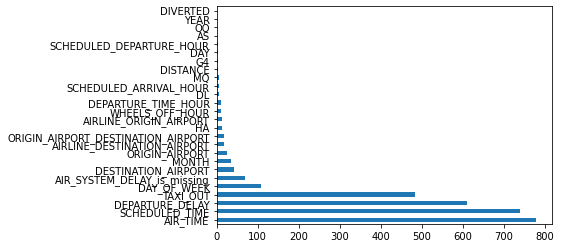

In [24]:
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(26).plot(kind='barh')
plt.show()

In [25]:
cols_after_removing_recursive=['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE_ORIGIN_AIRPORT',
       'WHEELS_OFF_HOUR', 'AIR_SYSTEM_DELAY_is_missing']
print(len(cols_after_removing_recursive))

10


In [27]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpBernoulliNBModel():
  model = BernoulliNB()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runexpBernoulliNBModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [0 0 0 ... 1 0 0]
Test ROC AUC score: 0.8374636612434339
Test accuracy score: 0.9075449658208017
Confusion matrix is  [[1299936       0]
 [ 167954  348712]]
Classification report is 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94   1299936
           1       1.00      0.67      0.81    516666

    accuracy                           0.91   1816602
   macro avg       0.94      0.84      0.87   1816602
weighted avg       0.92      0.91      0.90   1816602





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross-validated scores: {'fit_time': array([3.62052512, 2.94342589, 2.8767035 , 2.85217285, 2.85275149]), 'score_time': array([0.95175314, 0.92906833, 0.94656348, 0.92230797, 0.92284727]), 'test_accuracy': array([0.90709279, 0.90726159, 0.90757623, 0.90709845, 0.90764744]), 'test_roc_auc': array([0.83655601, 0.83685295, 0.83740648, 0.83656563, 0.83753189])}
cross for accuracy [0.90709279 0.90726159 0.90757623 0.90709845 0.90764744]
cross for roc-auc [0.83655601 0.83685295 0.83740648 0.83656563 0.83753189]


In [32]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpLinearSVCModel():
  model = LinearSVC()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  #cross_validation(model,X,y)

runexpLinearSVCModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


predictions are  [0 1 0 ... 1 0 0]
Test ROC AUC score: 0.8936578082280344
Test accuracy score: 0.9036684975575278
Confusion matrix is  [[1191879  108057]
 [  66939  449727]]
Classification report is 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93   1299936
           1       0.81      0.87      0.84    516666

    accuracy                           0.90   1816602
   macro avg       0.88      0.89      0.88   1816602
weighted avg       0.91      0.90      0.90   1816602





In [30]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpLinearSVCModel():
  model = LinearSVC()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runexpLinearSVCModel()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross-validated scores: {'fit_time': array([3161.3004806 , 3114.96133256, 2937.30273247, 2892.04454589,
       2889.20614862]), 'score_time': array([0.74737263, 0.62743735, 0.87725472, 0.58317566, 0.92567039]), 'test_accuracy': array([0.92016778, 0.92153698, 0.92266609, 0.91168867, 0.92267341]), 'test_roc_auc': array([0.87726153, 0.86889676, 0.88253616, 0.84522923, 0.88018774])}
cross for accuracy [0.92016778 0.92153698 0.92266609 0.91168867 0.92267341]
cross for roc-auc [0.87726153 0.86889676 0.88253616 0.84522923 0.88018774]
Cross-validated scores: {'fit_time': array([3161.3004806 , 3114.96133256, 2937.30273247, 2892.04454589,
       2889.20614862]), 'score_time': array([0.74737263, 0.62743735, 0.87725472, 0.58317566, 0.92567039]), 'test_accuracy': array([0.92016778, 0.92153698, 0.92266609, 0.91168867, 0.92267341]), 'test_roc_auc': array([0.87726153, 0.86889676, 0.88253616, 0.84522923, 0.88018774])}
cross for accuracy [0.92016778 0.92153698 0.92266609 0.91168867 0.92267341]
cross for

In [33]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpLGBMClassifierModel():
  model = LGBMClassifier(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runexpLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [0 0 0 ... 1 0 0]
Test ROC AUC score: 0.8943669585572716
Test accuracy score: 0.9284967208007038
Confusion matrix is  [[1265517   34419]
 [  95474  421192]]
Classification report is 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95   1299936
           1       0.92      0.82      0.87    516666

    accuracy                           0.93   1816602
   macro avg       0.93      0.89      0.91   1816602
weighted avg       0.93      0.93      0.93   1816602





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([43.73430777, 41.98292351, 41.80735707, 42.38198566, 42.39263821]), 'score_time': array([3.88832808, 3.48781157, 3.58263969, 3.47888708, 3.54605627]), 'test_accuracy': array([0.93007337, 0.93042243, 0.93062154, 0.93000284, 0.93055101]), 'test_roc_auc': array([0.89094871, 0.89133768, 0.89178791, 0.89073059, 0.89165437])}
cross for accuracy [0.93007337 0.93042243 0.93062154 0.93000284 0.93055101]
cross for roc-auc [0.89094871 0.89133768 0.89178791 0.89073059 0.89165437]


In [29]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpDecisionTreeModel():
  tree = DecisionTreeClassifier(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  tree.fit(sel_X_train, Y_train)
  pred=tree.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(tree,X,y)

runexpDecisionTreeModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']
predictions are  [0 1 0 ... 1 0 0]
Test ROC AUC score: 0.8818802177296695
Test accuracy score: 0.9010823504543097
Confusion matrix is  [[1204280   95656]
 [  84038  432628]]
Classification report is 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93   1299936
           1       0.82      0.84      0.83    516666

    accuracy                           0.90   1816602
   macro avg       0.88      0.88      0.88   1816

In [31]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpRandomForestModel():
  forest = RandomForestClassifier(max_features=16,max_depth=25,min_samples_leaf=10,random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  forest.fit(sel_X_train, Y_train)
  pred=forest.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)                                         #91.87
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(forest,X,y)

runexpRandomForestModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']
['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runLogisticRegressionModel():
  lrmodel=LogisticRegression()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  lrmodel.fit(sel_X_train, Y_train)
  pred=lrmodel.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(lrmodel,X,y)
  num_params = len(lrmodel.coef_) + 1
  aic_and_bic(Y_test,pred,num_params)

runLogisticRegressionModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predictions are  [0 1 0 ... 0 0 1]
Test ROC AUC score: 0.8296774206409845
Test accuracy score: 0.8885107080764145
Confusion matrix is  [[326571   9234]
 [ 43798  96066]]
Classification report is 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92    335805
           1       0.91      0.69      0.78    139864

    accuracy                           0.89    475669
   macro avg       0.90      0.83      0.85    475669
weighted avg       0.89      0.89      0.88    475669





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Cross-validated scores: {'fit_time': array([67.50734687, 65.93810582, 66.96874094, 66.1269958 , 65.12360954]), 'score_time': array([0.41015744, 0.42351747, 0.41843605, 0.40717268, 0.41280127]), 'test_accuracy': array([0.8936544 , 0.89500911, 0.89364285, 0.89404716, 0.8939663 ]), 'test_roc_auc': array([0.82146836, 0.82712552, 0.82564117, 0.82180698, 0.82085378])}
cross for accuracy [0.8936544  0.89500911 0.89364285 0.89404716 0.8939663 ]
cross for roc-auc [0.82146836 0.82712552 0.82564117 0.82180698 0.82085378]
[0 1 0 ... 0 0 1]
Number of parameters: 2
AIC: -13283217.569


NameError: ignored

In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runXGBClassifierModel():
  model=XGBClassifier()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runXGBClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12:14:03] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8799539221752859
Test accuracy score: 0.9069905175944303
Confusion matrix is  [[953982  55036]
 [ 77822 341595]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93   1009018
           1       0.86      0.81      0.84    419417

    accuracy                           0.91   1428435
   macro avg       0.89      0.88      0.89   1428435
weighted avg       0.91      0.91      0.91   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13:00:04] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13:33:07] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14:06:18] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14:39:28] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15:12:40] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Cross-validated scores: {'fit_time': array([1982.48600912, 1986.70746088, 1986.53589177, 1987.457937  ,
       1982.43312955]), 'score_time': array([3.77771521, 3.85807991, 3.84304357, 3.85526156, 3.86914086]), 'test_accuracy': array([0.91359997, 0.91408205, 0.91418706, 0.91419406, 0.91461583]), 'test_roc_auc': array([0.8665095 , 0.86698104, 0.86721075, 0.86698055, 0.86812215])}
cross for accuracy [0.91359997 0.91408205 0.91418706 0.91419406 0.91461583]
cross for roc-auc [0.8665095  0.86698104 0.86721075 0.86698055 0.86812215]


In [0]:
import numpy as np
indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(max_bin=175,num_leaves=150,lambda_l1=2,lambda_l2=2,max_depth=100)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8800385453476021
Test accuracy score: 0.9190337677248177
Confusion matrix is  [[983301  25717]
 [ 89938 329479]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94   1009018
           1       0.93      0.79      0.85    419417

    accuracy                           0.92   1428435
   macro avg       0.92      0.88      0.90   1428435
weighted avg       0.92      0.92      0.92   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([24.3630302 , 21.44919086, 23.55398035, 21.66500092, 21.79883909]), 'score_time': array([1.08807039, 1.12044597, 1.11795592, 1.10131145, 1.07081175]), 'test_accuracy': array([0.91874966, 0.91907598, 0.9190821 , 0.91961326, 0.91984778]), 'test_roc_auc': array([0.87857381, 0.87930443, 0.87920195, 0.87997243, 0.8802891 ])}
cross for accuracy [0.91874966 0.91907598 0.9190821  0.91961326 0.91984778]
cross for roc-auc [0.87857381 0.87930443 0.87920195 0.87997243 0.8802891 ]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(max_bin=150,num_leaves=150,lambda_l1=5,lambda_l2=5,max_depth=90,bagging_fraction=0.8)#decrease bagging_fraction
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'AIR_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
import numpy as np
indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(learning_rate=0.2,max_bin=150,num_leaves=250,min_data_in_leaf=300,lambda_l1=4,lambda_l2=4,max_depth=80,bagging_fraction=0.7)#decrease bagging_fraction
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8877440288649189
Test accuracy score: 0.9240553472856657
Confusion matrix is  [[984515  24503]
 [ 83979 335438]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95   1009018
           1       0.93      0.80      0.86    419417

    accuracy                           0.92   1428435
   macro avg       0.93      0.89      0.90   1428435
weighted avg       0.92      0.92      0.92   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([129.25216079, 130.30028796, 131.82165766, 130.97301698,
       131.62712002]), 'score_time': array([9.29587865, 9.15999746, 9.16376209, 9.16367054, 9.23544073]), 'test_accuracy': array([0.92362282, 0.92385289, 0.92412941, 0.92457219, 0.92467632]), 'test_roc_auc': array([0.88671826, 0.88728062, 0.88735556, 0.88814275, 0.88833141])}
cross for accuracy [0.92362282 0.92385289 0.92412941 0.92457219 0.92467632]
cross for roc-auc [0.88671826 0.88728062 0.88735556 0.88814275 0.88833141]


In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'max_bin':(125,150),#               #'learning_rate':(0.2,0.3),
     'feature_fraction':(0.6,0.7),
     'num_leaves':(250,300),#
     'min_data_in_leaf':(300,400),
     'lambda_l1':(1,2),#--6                    #'lambda_l2':(2,4,6),     #'max_depth':(60,80,90),
     'bagging_fraction':(0.4,0.5)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=3,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  5.9min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  6.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  6.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  9.1min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 11.8min
[Parallel(n_jobs=3)]: Done  11 tasks   

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  5.9min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  6.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  6.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  9.1min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 11.8min
[Parallel(n_jobs=3)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=90,
                                      num_leaves=31, objective=None,
                                      random_state=None, reg_...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=3,
             param_grid={'bag

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'max_bin':(100,125),#               #'learning_rate':(0.2,0.3),
     'feature_fraction':(0.7,0.8),
     'num_leaves':(300,350),#
     'min_data_in_leaf':(300),
     'lambda_l1':(1),#                    #'lambda_l2':(2,4,6),     #'max_depth':(60,80,90),
     'bagging_fraction':(0.3,0.4)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=3,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  7.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  7.0min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  7.3min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 10.3min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed: 10.4min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed: 10.9min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 13.8min
[Parallel(n_jobs=3)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=90,
                                      num_leaves=31, objective=None,
                                      random_state=None, reg_...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=3,
             param_grid={'bag

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.2,0.3),
     'lambda_l2':(2,4),     
     'max_depth':(60,80,90)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=3,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=1,max_bin=125,min_data_in_leaf=300,num_leaves=300)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  3.3min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  6.7min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  7.2min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  7.7min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 10.4min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed: 11.0min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed: 11.1min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 14.0min
[Parallel(n_jobs=3)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.4,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      feature_fraction=0.7,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=125,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=300, min_split_gain=0.0,
                                      n_estimat...
                                      num_iterations=90, num_leaves=300,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsampl

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.4,0.5),
     'lambda_l2':(6,8),     
     'max_depth':(40,50)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=4,refit="accuracy",pre_dispatch=5,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=1,max_bin=125,min_data_in_leaf=300,num_leaves=300)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  7.9min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 11.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 11.9min
[Parallel(n_jobs=4)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.4,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      feature_fraction=0.7,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=125,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=300, min_split_gain=0.0,
                                      n_estimat...
                                      num_iterations=90, num_leaves=300,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsampl

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.4,0.5),
     'lambda_l2':(6,8),     
     'max_depth':(40,50)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=4,refit="accuracy",pre_dispatch=5,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=1,max_bin=125,min_data_in_leaf=300,num_leaves=300)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  7.7min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 11.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.4,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      feature_fraction=0.7,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=125,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=300, min_split_gain=0.0,
                                      n_estimat...
                                      num_iterations=90, num_leaves=300,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsampl

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing'] 0.5 0.28402341431804395


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.564089	valid_0's binary_logloss: 0.564089
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.477696	valid_0's binary_logloss: 0.477696
[3]	valid_0's binary_logloss: 0.416326	valid_0's binary_logloss: 0.416326
[4]	valid_0's binary_logloss: 0.370314	valid_0's binary_logloss: 0.370314
[5]	valid_0's binary_logloss: 0.330874	valid_0's binary_logloss: 0.330874
[6]	valid_0's binary_logloss: 0.305183	valid_0's binary_logloss: 0.305183
[7]	valid_0's binary_logloss: 0.281462	valid_0's binary_logloss: 0.281462
[8]	valid_0's binary_logloss: 0.267687	valid_0's binary_logloss: 0.267687
[9]	valid_0's binary_logloss: 0.252254	valid_0's binary_logloss: 0.252254
[10]	valid_0's binary_logloss: 0.240314	valid_0's binary_logloss: 0.240314
[11]	valid_0's binary_logloss: 0.230897	valid_0's binary_logloss: 0.230897
[12]	valid_0's binary_logloss: 0.223842	valid_0's binary_logloss: 0.223842
[13]	valid_0's binary_logloss: 0.218212	valid_0

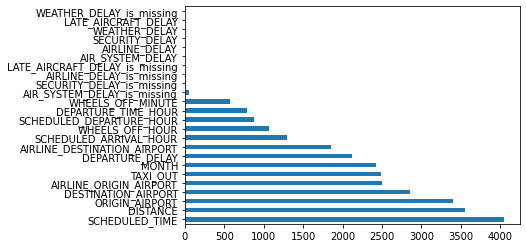

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Cross-validated scores: {'fit_time': array([70.00118089, 65.61604452, 66.29497695, 67.37669063, 66.78477693]), 'score_time': array([6.09124398, 5.83210969, 5.91067863, 5.98601341, 5.88637948]), 'test_accuracy': array([0.93368523, 0.93419981, 0.93417195, 0.93377285, 0.93423499]), 'test_roc_auc': array([0.8976817 , 0.89834447, 0.89831632, 0.89770791, 0.89839949])}
cross for accuracy [0.93368523 0.93419981 0.93417195 0.93377285 0.93423499]
cross for roc-auc [0.8976817  0.89834447 0.89831632 0.89770791 0.89839949]


In [35]:
import numpy as np
import matplotlib.pyplot as plt

sel_cols=cols
print(sel_cols,Y_train.OUTCOME.mean(),Y_test.OUTCOME.mean())

def runLGBMClassifierModel():
  model=LGBMClassifier(extra_trees=True,num_iterations=100,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=3,max_bin=125,min_data_in_leaf=300,num_leaves=300,lambda_l2=8,learning_rate=0.2,max_depth=40)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  sel_X_valid=X_valid[sel_cols]
  eval_set = [(sel_X_test, Y_test)]
  model.fit(sel_X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

  print("Test dataset:")
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)

  print("\n")

  print("Validation dataset:")
  pred=model.predict(sel_X_valid)
  print("predictions are ",pred)
  report(Y_valid,pred)

  
  print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
  #plot graph of feature importances for better visualization
  feat_importances = pd.Series(model.feature_importances_, index=sel_cols)
  feat_importances.nlargest(26).plot(kind='barh')
  plt.show()

  X=pd.concat([sel_X_train[:4285506],sel_X_test,sel_X_valid])
  y=pd.concat([Y_train[:4285506],Y_test,Y_valid])
  cross_validation(model,X,y)

runLGBMClassifierModel()

In [0]:
cols[8:13]

['AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_ORIGIN_AIRPORT']

In [0]:
def runXGBoostModel():
  # fit model no training data
  model = XGBClassifier(learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=300, 
                      reg_alpha = 0.3,
                      max_depth=4,
                      n_jobs=10,
                      gamma=10)
  model.fit(X_train, Y_train)
  # make predictions for test data
  y_pred = model.predict(X_test)
  print("Initial predictions are ",y_pred)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  report(Y_test,predictions)
  X=pd.concat([X_train,X_test])
  y=pd.concat([Y_train,Y_test])
  cross_validation(model,X,y)
  
runXGBoostModel()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[08:09:19] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Initial predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.86731179532437
Test accuracy score: 0.9062176437849815
Confusion matrix is  [[970241  38777]
 [ 95185 324232]]
Classification report is 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94   1009018
           1       0.89      0.77      0.83    419417

    accuracy                           0.91   1428435
   macro avg       0.90      0.87      0.88   1428435
weighted avg       0.91      0.91      0.90   1428435





NameError: ignored

In [0]:
def runXGBoostModel():
  # fit model no training data
  model = XGBClassifier()
  eval_set = [(X_test, Y_test)]
  model.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
  # make predictions for test data
  y_pred = model.predict(X_test)
  print("Initial predictions are ",y_pred)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  report(Y_test,predictions)
  X=pd.concat([X_train,X_test])
  y=pd.concat([Y_train,Y_test])
  cross_validation(lgbclassifier,X,y)
  
runXGBoostModel()